# Final Project Biof309:  Investigating global tuberculosis trends from 2000 to 2018

Author: Emma Rowley

Description:  Tuberculosis (TB) is the worlds leading cause of mortality from infectious disease with 1.5 million deaths attributed to TB in 2018.  This project will utilize the World Health Organization's data to explore global TB trends over the past two decades. 


First, let's import and install packages that we'll need to accomplish this task

In [242]:
#pip install chart_studio

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
import chart_studio
import chart_studio.plotly as py
import plotly
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

Next, let's upload the data and begin to familiarize ourselves with its elements. 

The data set used in this project was obtained the World Health Organization and can be found at: https://www.who.int/tb/country/data/download/en/¶

In [300]:
#Read the CSV file as a pandas dataframe
burden_estimates = "https://extranet.who.int/tme/generateCSV.asp?ds=estimates"
TB_data = pd.read_csv(burden_estimates)

In [301]:
#Show first 5 rows of the dataframe and see the variables (columns) it contains
TB_data.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20779953,190.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,18.0,13.0,28.0
1,Afghanistan,AF,AFG,4,EMR,2001,21606988,189.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,25.0,17.0,38.0
2,Afghanistan,AF,AFG,4,EMR,2002,22600770,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
3,Afghanistan,AF,AFG,4,EMR,2003,23680871,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,31.0,22.0,48.0
4,Afghanistan,AF,AFG,4,EMR,2004,24726684,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,39.0,28.0,61.0


What do the variables seen above mean? The variable definitions can be found by downloading the data dictionary csv from the link found on the original page. Let's read this csv into a data frame so we are able to look up the meanings of variables if needed.

In [302]:
#Read in the CSV for the definitions of variable names so we can determine what they mean
dictionarylink = "https://extranet.who.int/tme/generateCSV.asp?ds=dictionary"
TB_data_dictionary = pd.read_csv(dictionarylink)
#Keep only dictionary definitions that are included in this dataset
TB_data_dictionary_estimates = TB_data_dictionary[TB_data_dictionary["dataset"] == "Estimates"]
#Set index as variable name
TB_data_dictionary_estimates.set_index("variable_name")

,dataset,code_list,definition
variable_name,,,
c_cdr,Estimates,NaN,Case detection rate (all forms) [also known as...
c_cdr_hi,Estimates,NaN,Case detection rate (all forms) [also known as...
c_cdr_lo,Estimates,NaN,Case detection rate (all forms) [also known as...
c_newinc_100k,Estimates,NaN,"Case notification rate, which is the total of ..."
cfr,Estimates,NaN,Estimated TB case fatality ratio
...,...,...,...
source_drs_coverage_ret,Estimates,NaN,Indicates whether national or subnational data...
source_drs_year_new,Estimates,NaN,"Year of drug resistance surveillance, survey o..."
source_drs_year_ret,Estimates,NaN,"Year of drug resistance surveillance, survey o..."


How much data do we have? 

In [303]:
#get shape of dataframe
TB_data.shape

(4040, 50)

There are 4040 rows and 50 columns present in this dataframe.  Each row contains a country, year of collection, and various indicators of TB burden. For example, cfr is the estimated case fatality ratio of TB.

Is this data set complete?  Do all countries and years have data for the variables of interest?

In [304]:
#total number of missind data points (NaN) per column
missing_obs = TB_data.isna().sum()
#proportion missing data
print(missing_obs / 4040)

country                     0.000000
iso2                        0.004703
iso3                        0.000000
iso_numeric                 0.000000
g_whoregion                 0.000000
year                        0.000000
e_pop_num                   0.000000
e_inc_100k                  0.000000
e_inc_100k_lo               0.000000
e_inc_100k_hi               0.000000
e_inc_num                   0.000000
e_inc_num_lo                0.000000
e_inc_num_hi                0.000000
e_tbhiv_prct                0.151733
e_tbhiv_prct_lo             0.151733
e_tbhiv_prct_hi             0.151733
e_inc_tbhiv_100k            0.151733
e_inc_tbhiv_100k_lo         0.151733
e_inc_tbhiv_100k_hi         0.151733
e_inc_tbhiv_num             0.151733
e_inc_tbhiv_num_lo          0.151733
e_inc_tbhiv_num_hi          0.151733
e_mort_exc_tbhiv_100k       0.000000
e_mort_exc_tbhiv_100k_lo    0.000000
e_mort_exc_tbhiv_100k_hi    0.000000
e_mort_exc_tbhiv_num        0.000000
e_mort_exc_tbhiv_num_lo     0.000000
e

No, the the dataset is not complete.  Some variables like e_mort_100k (estimated mortality of all TB cases per 100k) have data points for every row, while others like cfr (case fatality ratio) are missing signifcant portions of data.

Countries are labelled with their fullname, a 2 letter identifier (Iso2), a 3 letter identifier (Iso3), and a numeric identifier (Iso_numeric).  They are also grouped by geographic region (g_whoregion).  However, the definition of g_whoregion is not listed in the data frame containing the variable defintions.  So how many regions are the countries grouped into and what exactly are these regions?

In [305]:
TB_data["g_whoregion"].value_counts()

EUR    1016
AFR     882
AMR     844
WPR     684
EMR     407
SEA     207
Name: g_whoregion, dtype: int64

The countries are grouped into 6 regions.  The full identifiers of the region codes can be found at: https://apps.who.int/gho/data/node.metadata.REGION?lang=en.  EMR stands for Eastern Mediterranean.  AFR stands for Africa.  AMR stands for the Americas.  WPR stands for Western Pacific Region.  EUR stands for Europe, and SEA stand for South East Asia

What range of years does this data set contain?  And are all countries accounted for in all years?  Or have some countries only more recently begun collecting this data?

In [306]:
TB_data["year"].value_counts()

2017    216
2015    216
2012    216
2014    216
2016    216
2018    216
2011    216
2013    216
2010    214
2005    211
2007    211
2009    211
2008    211
2006    211
2003    209
2004    209
2002    209
2001    208
2000    208
Name: year, dtype: int64

This data set contains information on TB incidence from 2000 to 2018.  There are more countries with available data in 2018 than there were in 2000.

Now, that we have familiarized ourselves a bit with this data set.  Let's see what we can learn from it. 

# Question 1: How has global incidence of TB has changed from 2000 to 2018? 

In [307]:
#creat a list of years that we have data for to serve as the x axis for our plot
list_of_years = (TB_data.drop_duplicates("year")["year"]).tolist()

#create a empty list that will hold our total number of incident cases by year
e_inc_num_by_year = []
for x in list_of_years:
#perform the function below for all values found in list_of_years
    def data_by_year(x):
        """This function will yield the sum of all incident cases for all countries in a given year."""
        TB_data_year = TB_data[TB_data["year"]==x]
        return TB_data_year["e_inc_num"].sum()
    e_inc_num_by_year.append(data_by_year(x))
#gives us a list containing the total number of global incident cases from 2000 to 2018

#create a dataframe of years and total incidence in year
global_incidence = pd.DataFrame(list_of_years, columns = ["year"])
global_incidence["global incidence"] = e_inc_num_by_year

#create plot using interactive plotly
px.line(global_incidence, x="year", y="global incidence", title="Global Tuberculosis Incidence")

The data shows that the overall number TB cases globally has decreased from 2000 to 2018.  The number of cases increased in the early 2000's and has decreased from 2005 onwards.  

# Question 2:  How has TB incidence varied by region?

In [308]:
#Calculate the number of incident cases by region for reach year
def regions_by_year(tb_data_region_type):
    TB_data_region = TB_data[TB_data["g_whoregion"] == tb_data_region_type]
    e_inc_num = []
    for x in list_of_years:
        def data_by_year(x):
            TB_data_region_year = TB_data_region[TB_data_region["year"]==x]
            return TB_data_region_year["e_inc_num"].sum()
        e_inc_num.append(data_by_year(x))
    return e_inc_num

emr = regions_by_year('EMR')
afr = regions_by_year('AFR')
sea = regions_by_year('SEA')
wpr = regions_by_year('WPR')
amr = regions_by_year('AMR')
eur = regions_by_year('EUR')

#Create Plotly plot of incidence by region
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list_of_years, y=emr, name="Eastern Mediterranean"))
fig.add_trace(go.Scatter(x=list_of_years, y=afr, name="Africa"))
fig.add_trace(go.Scatter(x=list_of_years, y=sea, name="South East Asia"))
fig.add_trace(go.Scatter(x=list_of_years, y=wpr, name="Western Pacific Region"))
fig.add_trace(go.Scatter(x=list_of_years, y=amr, name="Americas"))
fig.add_trace(go.Scatter(x=list_of_years, y=eur, name="Europe"))

This plot shows us that South East Asian countries account for the majority of TB cases with Afrcia accounting for the second most number. South East Asia's overall cases incidence numbers have followed the same trend as the global plot we created with increases in the early 2000's followed by a decrease in incidence. The Western Pacific Region, and Europe have seen steady declines in cases since 2000, while incidence has remained fairly consistent in the America's with a slight increase. Both Africa and the Eastern Mediteranean have seen an increase in cases since 2000. So, TB incidence is declining on the whole, but not all countries and regions have seen a decline in cases.

# Question 3:  How has TB incidence varied by country?

In [255]:
#take only the data wanted for this graph
TB_data_gyeinc100 = TB_data[["country","g_whoregion", "year", "e_inc_100k"]]
#rename columns
TB_data_gyeinc100rename = TB_data_gyeinc100.rename(columns = {"g_whoregion": "geographic region", "e_inc_100k": "incident cases per 100k"})

#create plot using interactive plotly to make it easier to look at individual countries
px.line(TB_data_gyeinc100rename, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k by Country")

There's alot going on in this plot making it hard to read.  It is clear however that some countries have seen remarkable decrease in TB incidecne from 2000 to 2018.  Let's create some country plots based on region to explore a bit further.

In [335]:
#create region specific dataframes
gyeEMR = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "EMR"]
gyeEUR = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "EUR"]
gyeSEA = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "SEA"]
gyeWPR = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "WPR"]
gyeAFR = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "AFR"]
gyeAMR = TB_data_gyeinc100rename[TB_data_gyeinc100rename["geographic region"] == "AMR"]

In [321]:
#country plot for just Americas
px.line(gyeAMR, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in America")

In [322]:
#coutnry plots for Eastern Mediterranean Region
px.line(gyeEMR, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in the Eastern Mediterranean Region")

In [323]:
#country plot for Europe
px.line(gyeEUR, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in Europe")

In [324]:
#country plot for South East Asia
px.line(gyeSEA, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in South East Asia")

In [325]:
#country plot for Western Pacific Region
px.line(gyeWPR, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in Western Pacific Region")

In [327]:
#country plot for Africa
px.line(gyeAFR, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k in Africa")

In [331]:
#create a dataframe of data only from the year 2000
TB_data_2000 = TB_data[TB_data["year"] == 2000]
#select columns wanted
TB_2000_candinc =  TB_data_2000[["country", "g_whoregion", "e_inc_100k"]]
#set country as index
TB_2000_index = TB_2000_candinc.set_index("country")
#rename column to distinguish between 2000 and 2018
TB_2000_labindex = TB_2000_index.rename(columns = {"e_inc_100k":"e_inc_100k_2000"})

#repeat for 2018 data
TB_data_2018 = TB_data[TB_data["year"] == 2018]
TB_2018_candinc =  TB_data_2018[["country", "e_inc_100k"]]
TB_2018_index = TB_2018_candinc.set_index("country") 
TB_2018_labindex = TB_2018_index.rename(columns = {"e_inc_100k":"e_inc_100k_2018"})

#combine 2000 and 2018 data into a single data frame
TB_2000_2018 = pd.concat([TB_2000_labindex, TB_2018_labindex], axis = 1, join="inner")

#select only countries with fewer cases in 2018 than 2000
TB_less_2018 = TB_2000_2018[TB_2000_2018["e_inc_100k_2018"] < TB_2000_2018["e_inc_100k_2000"]]

#Create a data table of coutnries with fewer cases in 2018 and then rank them largest decrease
TB_less_2018["case_decrease_per_100k"]  = TB_less_2018["e_inc_100k_2018"] - TB_less_2018["e_inc_100k_2000"]
TB_less_2018.sort_values("case_decrease_per_100k", ascending=[True]).head()

C:\Users\ehrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,g_whoregion,e_inc_100k_2000,e_inc_100k_2018,case_decrease_per_100k
country,,,,
Botswana,AFR,914.0,275.0,-639.0
Namibia,AFR,985.0,524.0,-461.0
Djibouti,EMR,692.0,260.0,-432.0
Zambia,AFR,759.0,346.0,-413.0
Eswatini,AFR,731.0,329.0,-402.0


Countries in various regions have shownn significant decreases in TB incidence.  The greatest decreases in incidence are seen in Africa with Bostswana, Namibia, Zambia, and Eswatini demonstrating 4 of the 5 greatest decreases in incidence. 

# Question 4:  What countries have seen increases in TB incidence since 2000?

Index(['Angola', 'Australia', 'Bermuda', 'Congo', 'Cyprus', 'Dominica',
       'El Salvador', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Grenada', 'Guam',
       'Guinea-Bissau', 'Guyana', 'Liberia', 'Malaysia', 'Malta',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Mozambique',
       'Nauru', 'Niue', 'Palau', 'Panama', 'Paraguay', 'Republic of Korea',
       'Republic of Moldova', 'Sao Tome and Principe', 'Suriname', 'Sweden',
       'Tokelau', 'Trinidad and Tobago', 'Tunisia', 'Tuvalu', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='country')


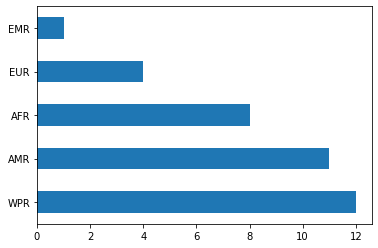

In [333]:
#create a data frame of countries with more cases in 2018 than 2000
TB_greater_2018 = TB_2000_2018[TB_2000_2018["e_inc_100k_2018"] > TB_2000_2018["e_inc_100k_2000"]]

#see how many and which countries saw an increase in cases
print(TB_greater_2018.index)
len(TB_greater_2018.index)

#create a bar chart to see what regions have the cases with the most increases
TB_greater_2018['g_whoregion'].value_counts().plot(kind='barh')

In [334]:
#create a dataframe of countries that saw case increases from 2000 to 2018
countrieswincrease = TB_greater_2018.index.tolist()
increase_countries = TB_data_gyeinc100rename[TB_data_gyeinc100rename["country"].isin(countrieswincrease)]

#create plot using interactive plotly to make it easier to look at individual countries
px.line(increase_countries, x="year", y="incident cases per 100k", color="country", title="Incident Cases per 100k by Country")

In [310]:
TB_greater_2018["case_increase_per_100k"]  = TB_greater_2018["e_inc_100k_2018"] - TB_greater_2018["e_inc_100k_2000"]
TB_greater_2018.sort_values("case_increase_per_100k", ascending=[False]).head()

C:\Users\ehrow\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,g_whoregion,e_inc_100k_2000,e_inc_100k_2018,case_increase_per_100k
country,,,,
Marshall Islands,WPR,84.0,434.0,350.0
Equatorial Guinea,AFR,96.0,201.0,105.0
Tuvalu,WPR,196.0,270.0,74.0
Niue,WPR,0.0,71.0,71.0
Liberia,AFR,240.0,308.0,68.0


36 countries saw an increase in the number of cases per 100k in 2018 compared to 2000.  The Western Pacific Region has the most countries with an increase in the number of cases since 2000 followed by the Americas and Africa. Interestingly, no countries in South East Asia have seen an increase in cases even though the region accounts for the majority of global TB cases. The Marshall Islands has seen the greatest increase in the number of cases by far.  Followed by Equatorial Guinea, Tuvalu, Niue, and Liberia. 

# Question 5:  How do countries vary based on indicators other than incidence per 100k of population?  

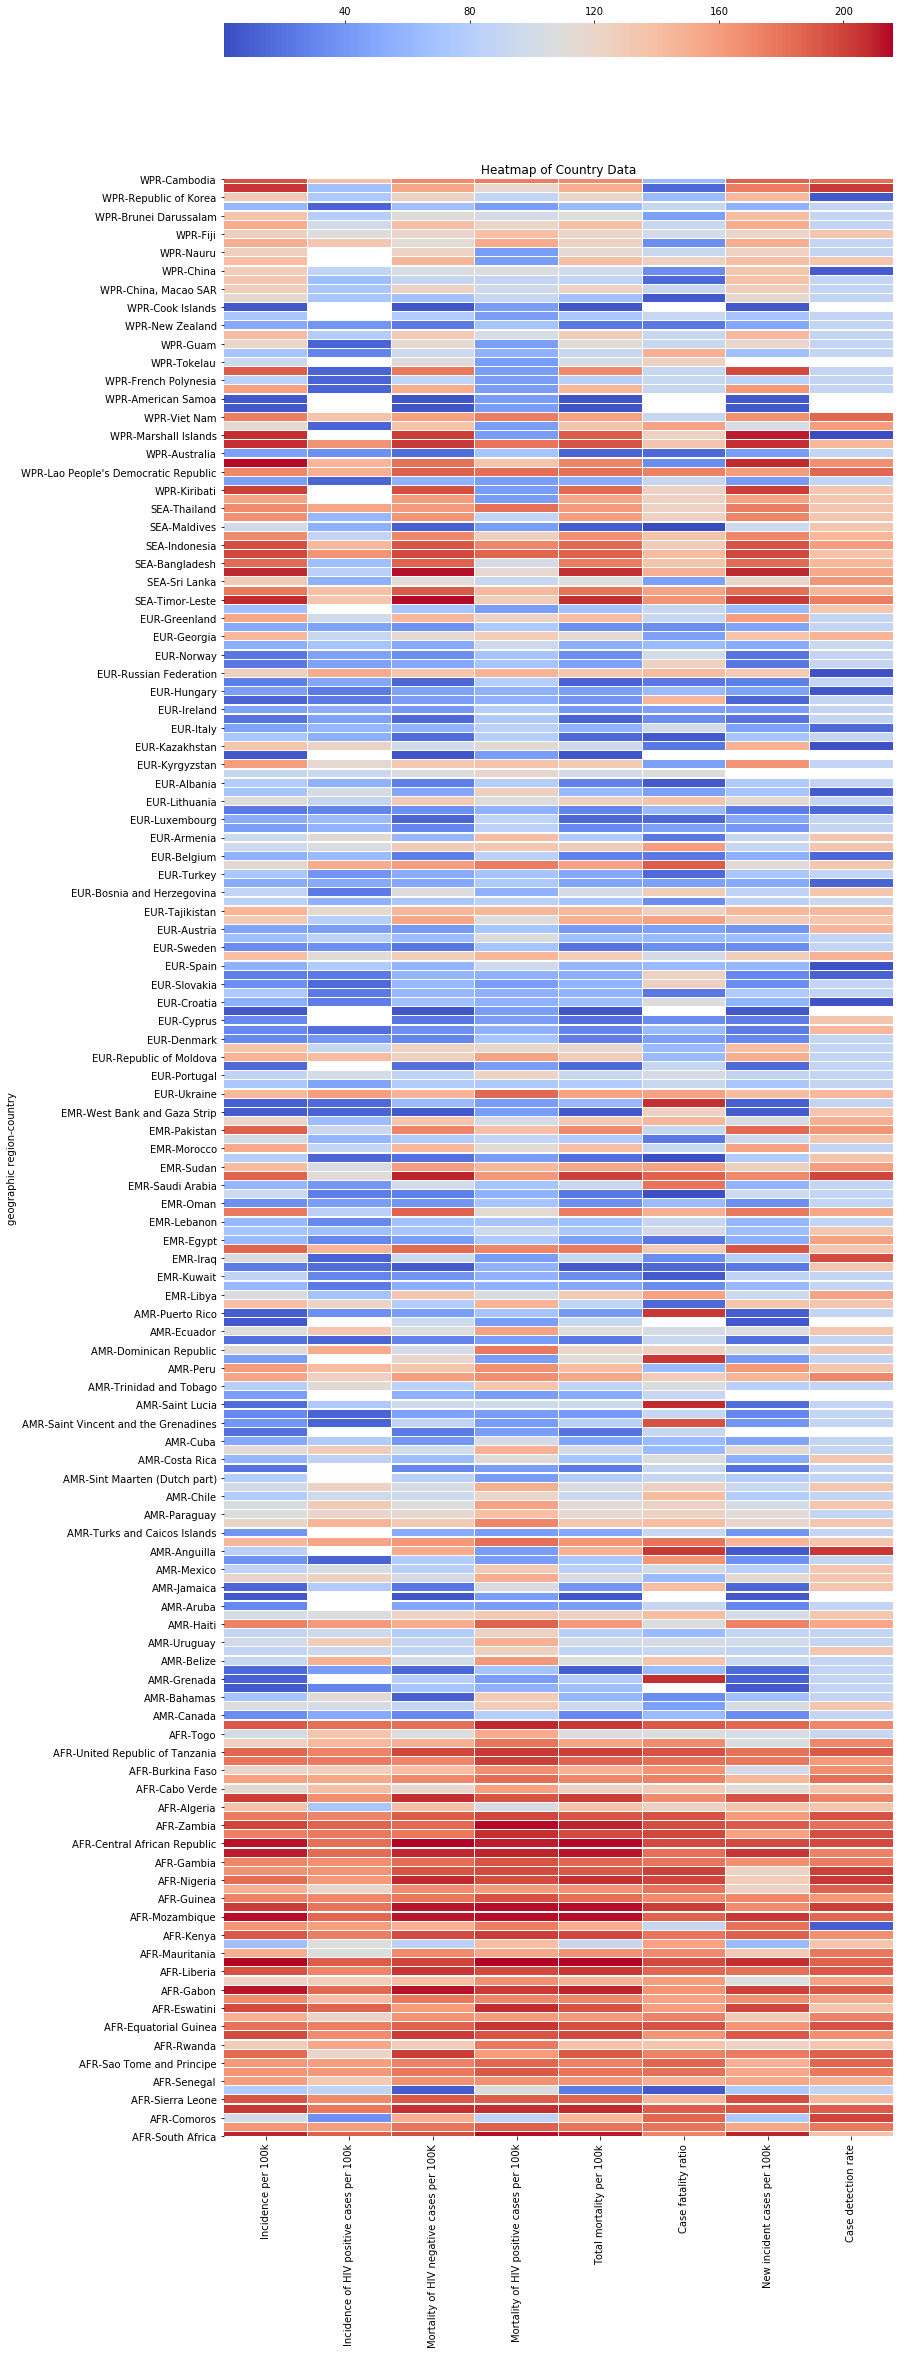

In [293]:
#select only data from 2018
TB_data_2018_HM = TB_data[TB_data["year"]==2018]

#remove columns that provide repetitive information so that the heatmap isn't overwhelming for example high and low bound estimates or estimates that are not per 100k population
clean_2018 = TB_data_2018_HM.drop(["iso2","iso3", "e_inc_tbhiv_num_hi", "iso_numeric", "year", "e_pop_num", "e_inc_100k_lo", "e_tbhiv_prct", "e_inc_100k_hi", "e_inc_num_hi", "e_inc_num_lo", "e_pop_num", "e_tbhiv_prct_lo", "e_tbhiv_prct_hi", "e_inc_tbhiv_100k_lo", "e_inc_tbhiv_100k_hi", "cfr_lo", "cfr_hi", "e_inc_tbhiv_num_lo", "e_mort_num_lo", "cfr_pct_hi", "e_mort_num_hi", "cfr_pct_lo", "c_cdr_lo", "c_cdr_hi", "e_mort_100k_hi", "e_mort_100k_lo", "e_mort_tbhiv_num_hi", "e_mort_tbhiv_num_lo", "e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_tbhiv_100k_lo", "e_mort_tbhiv_100k_hi", "e_mort_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_lo","e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_num", "e_mort_exc_tbhiv_num", "e_mort_num", "e_mort_tbhiv_num", "e_inc_tbhiv_num", "e_inc_num", "e_mort_tbhiv_num", "cfr"], axis=1)
#rename g_who region column
clean_2018["geographic region"] = clean_2018["g_whoregion"]
#set geographic region and country as index and then sort by geographic region
clean_2018 = clean_2018.set_index(["geographic region", "country"])
clean_2018_sorted = clean_2018.sort_values("geographic region", ascending=[False])

#rank each country from 1-216 with 1 being best performance for each indicator so we can compare countries. 
clean_2018_sorted["Incidence per 100k"] = clean_2018_sorted["e_inc_100k"].rank(method="max")
clean_2018_sorted["Incidence of HIV positive cases per 100k"] = clean_2018_sorted["e_inc_tbhiv_100k"].rank(method="max")
clean_2018_sorted["Mortality of HIV negative cases per 100K"] = clean_2018_sorted["e_mort_exc_tbhiv_100k"].rank(method="max")
clean_2018_sorted["Mortality of HIV positive cases per 100k"] = clean_2018_sorted["e_mort_tbhiv_100k"].rank(method="max")
clean_2018_sorted["Total mortality per 100k"] = clean_2018_sorted["e_mort_100k"].rank(method="max")
clean_2018_sorted["Case fatality ratio"] = clean_2018_sorted["cfr_pct"].rank(method="max")
clean_2018_sorted["New incident cases per 100k"] = clean_2018_sorted["c_newinc_100k"].rank(method="max")
clean_2018_sorted["Case detection rate"] = clean_2018_sorted["c_cdr"].rank(method="max", ascending=False)
rankings_2018 = clean_2018_sorted[["Incidence per 100k", "Incidence of HIV positive cases per 100k", "Mortality of HIV negative cases per 100K", "Mortality of HIV positive cases per 100k", "Total mortality per 100k", "Case fatality ratio", "New incident cases per 100k", "Case detection rate"]]

#create a heat map of indicators with dark blue being high ranking/positive ranking and red being low ranking/negative outcome
fig_dims=(12,45)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(rankings_2018, vmin=1, vmax=216, linewidth=.2, cbar_kws = dict(use_gridspec=False,location="top"), cmap="coolwarm")
ax.set_title("Heatmap of Country Data")
plt.show()

Ranking based on indicators of TB burden appears to cluster based on geographic region.  Most countries in Europe are highly ranking in the selected indicators, while most countries in South East Asia and Africa rank poorly.

# Question 6:  What role does HIV have in TB mortality?

TB is an opportunistic infection.  HIV weakens the immune system increasing an individuals risk from TB.  Let's see if coincidence of HIV and TB impacts overall case fatality ratio. 

In [337]:
#plotly plot comparing looking at case fatality ratio and coincidence of TB and HIV
TB_data_HIVrename = TB_data.rename(columns = {"cfr": "case fatality ratio", "g_whoregion": "geographic region", "e_inc_100k": "incidence per 100k", "e_inc_tbhiv_100k": "coincidence of HIV and TB per 100k"})
fig = px.scatter(TB_data_HIVrename, x="case fatality ratio", y="coincidence of HIV and TB per 100k", size= "incidence per 100k", log_y=True, color="geographic region", hover_name="country", size_max=40)
fig.update_xaxes(range=[0, 0.45])
fig.show()

There appears to be a correlation between case fatality ratio and the coincidence of TB and HIV per 100k.  This is particularly apparent in Africa where many countries have high incidence of both TB and HIV and high case fatality ratios.

# Major Conclusions:  

1. Global incidence of tuberculosis has declined from 2000-2018.
2. Cases from South East Asia account for the majority of tuberculosis cases.
3. Africa and the Eastern Mediterranean Region have both seen increases in cases since 2000, while other regions have seen decreases in incident cases.
4. Some countries have seen significant decreases in TB incidence from 2000-2018.  Several notable contries include: Botswana, Namibia, Dijibouti, Eswatini, Zambia. 
5. 36 countries have seen increases in incident cases. The majority of countries that saw cases increases were found in the Western Pacific Region, the Americas, or Africa.
6. There is great variation in the reported outcomes based on region.  Countries in South East Asia and Africa rank poorly on many indicators of TB burden including incidence, mortality, and case fatality ratios. 
7.  There appears to correlation between the case fatality ratio and the coincidence of TB and HIV.  This is particularly apparent in Africa where TB and HIV coincidence is high as are case fatality ratios. 